In [1]:
from rpy2.robjects.packages import STAP
from rpy2.robjects import numpy2ri
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
numpy2ri.activate()

In [2]:
with open("simulateGP.R", "r") as f:
    string = f.read()
sampleDataFromG = STAP(string, "sampleDataFromG")

In [3]:
n = 500
G = np.array([[0, 1], [0, 0]], dtype="float64")
x = sampleDataFromG.sampleDataFromG(n, G)

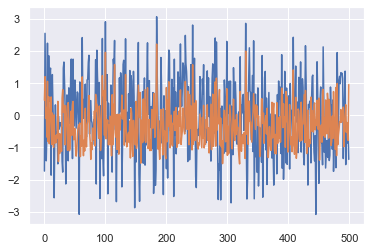

In [4]:
plt.plot(x)

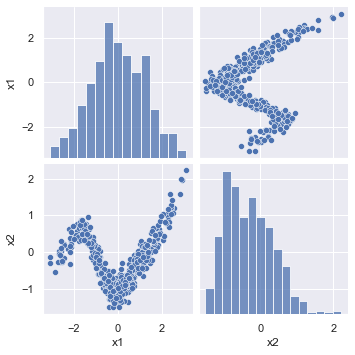

In [5]:
df_x = pd.DataFrame(x, columns=["x1", "x2"])
sns.pairplot(df_x)

In [6]:
n = 500
G = np.array([[0, 1, 1], [0, 0, 0], [0, 1, 0]], dtype="float64")
x = sampleDataFromG.sampleDataFromG(n, G)

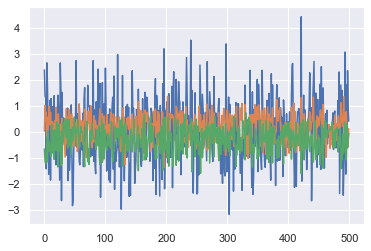

In [7]:
plt.plot(x)

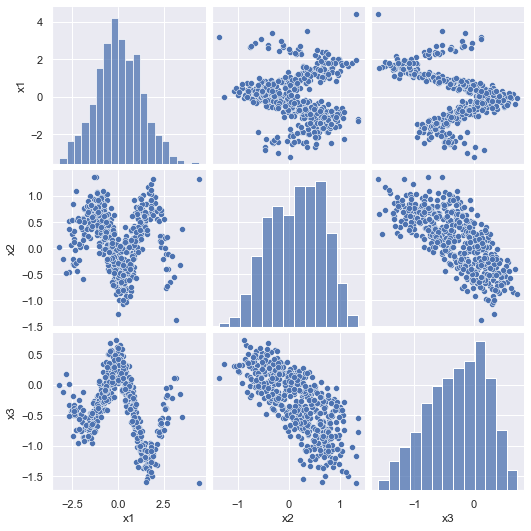

In [8]:
df_x = pd.DataFrame(x, columns=["x1", "x2", "x3"])
sns.pairplot(pd.DataFrame(df_x))